<a href="https://colab.research.google.com/github/sheetal73/BrainTumorDetection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [7]:
!pip install kaggle

In [8]:
from google.colab import files
upload=files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [9]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 73% 11.0M/15.1M [00:00<00:00, 22.2MB/s]
100% 15.1M/15.1M [00:00<00:00, 30.7MB/s]


In [10]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('File Unizipped')

File Unizipped


In [11]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
      y.append((i[0:1]))
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
for i in range(1,99):
    y.append('N')

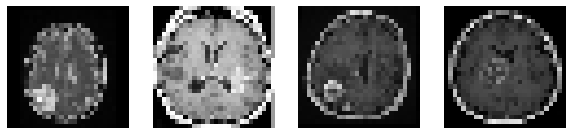

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (28, 28, 3)
Shape of an image in X_test:  (28, 28, 3)


In [14]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [15]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ",X_test.shape)

X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)


In [16]:
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [17]:
model=Sequential()
model.add(BatchNormalization(input_shape = (28,28,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (28, 28, 3))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten()) 
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

In [18]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

In [20]:
history = model.fit(X_train,y_train,
                    epochs=50, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/50
6/6 [==============================] - 33s 105ms/step - loss: 0.6855 - accuracy: 0.4674 - val_loss: 0.9353 - val_accuracy: 0.6071
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6198 - accuracy: 0.6898 - val_loss: 1.5519 - val_accuracy: 0.6071
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6131 - accuracy: 0.7044 - val_loss: 1.2604 - val_accuracy: 0.6071
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5493 - accuracy: 0.7667 - val_loss: 1.1173 - val_accuracy: 0.6071
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5342 - accuracy: 0.7701 - val_loss: 1.9232 - val_accuracy: 0.6071
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.4990 - accuracy: 0.7943 - val_loss: 0.5989 - val_accuracy: 0.7262
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 0.4588 - accuracy: 0.7994 - val_loss: 0.9370 - val_accuracy: 0.6667
Epoch 8/50
6/6 [=========

3/3 [==============================] - 0s 5ms/step - loss: 0.7235 - accuracy: 0.8929
test: accuracy= 0.892857 ; loss=0.723512


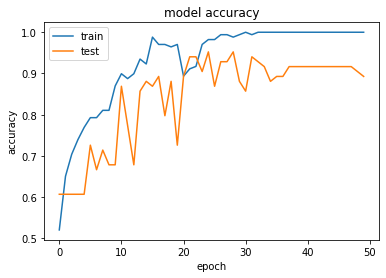

In [21]:
loss,accuracy =model.evaluate(X_test,y_test)
print("test: accuracy= %f ; loss=%f" %(accuracy,loss))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', "test"], loc='upper left')
plt.show()

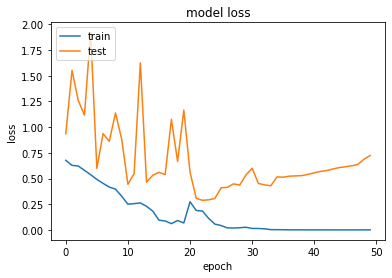

In [22]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


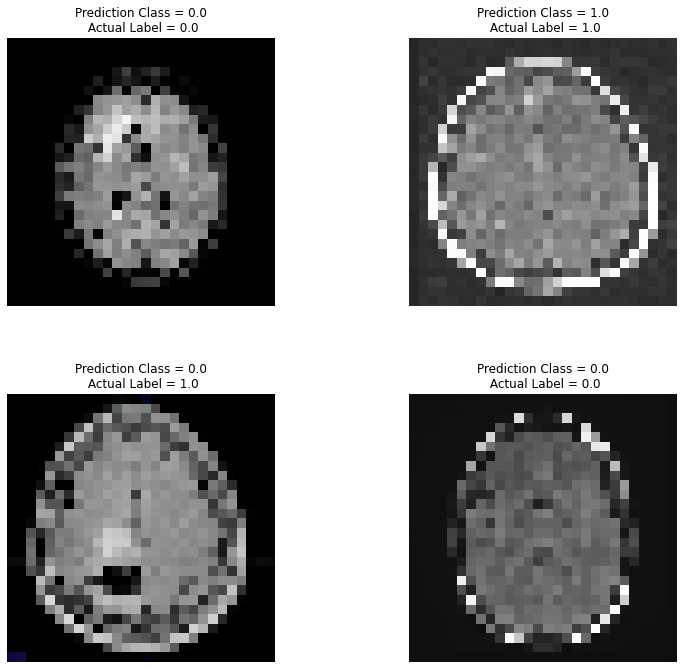

In [23]:
y_predicted=model.predict_classes(X_test,batch_size=1)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [24]:

from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.94      0.88      0.91        51

    accuracy                           0.89        84
   macro avg       0.89      0.90      0.89        84
weighted avg       0.90      0.89      0.89        84



In [25]:
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
model.save_weights('Brain_Tumor_Detection.h5')

with open('Brain_Tumor_Detection.json', 'w') as f:
    f.write(model.to_json())

# Load Weights + Architecture
with open('Brain_Tumor_Detection.json', 'r') as f:
    new_model = model_from_json(f.read())
new_model.load_weights('Brain_Tumor_Detection.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')